#**Domain - IPL Dataset**

* Created by: **Shreenidhi Kulkarni** | **2348455**
* Created Date: 20.03.2024
* Edited Dates: 21.03.2024




##**Lab Exercise 5 - K-Nearest Neighbour**

##**AIM:**


The aim of this project is to explore the application of the **K-Nearest Neighbors (KNN)** algorithm on a given dataset. Specifically, the project aims to:

1. Investigate the impact of varying K values on the performance of the KNN algorithm.
2. Evaluate the effectiveness of different distance metrics (such as Euclidean distance, Manhattan distance, and Cosine Similarity) in influencing the predictions of the KNN algorithm.
3. Determine the most suitable configuration of K value and distance metric for the dataset to achieve optimal predictive accuracy.
4. Generate insights into the strengths and limitations of the KNN algorithm in the context of the dataset.

**OBJECTIVE:**

* Perform 'K-Nearest Neighbour' on dataset 'Indian Premier League'
* Dataset: https://bit.ly/34SRn3b

#**1. Importing Libraries**
* numpy - for numerical, array, matrices (Linear Algebra) processing
* pandas - for loading and processing datasets
* matplotlib.pyplot - For visualisation
* Saeborn - for statistical graph
* scipy.stats  use a variety of statistical functions
* train_test_split
* LinearRegression
* mean_squared_error, r2_score

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#**2. Load the dataset into your runtime environment.**

The **IPL Dataset** provides a comprehensive view of cricket match data, spanning multiple seasons, cities, and teams, presenting a valuable opportunity to explore match dynamics and influencing factors. Through extensive Exploratory Data Analysis (EDA) and visualizations like histograms, box plots, and violin plots, we aim to understand the dataset's structure, uncovering insights into match outcomes, seasonal patterns, and correlations among variables. Following EDA, Regression Analysis will be conducted, selecting an appropriate regression model based on the data's nature and relationships between variables. The chosen model will be trained using training data, and its performance will be evaluated using metrics such as Mean Squared Error (MSE) and R-squared. Interpretation of regression coefficients will offer insights into the relationship between independent and dependent variables, identifying significant predictors and assessing the model's goodness-of-fit in capturing underlying patterns in the data.

In [ ]:
# Reading the csv files
df = pd.read_csv("/content/matches.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/matches.csv'

In [ ]:
# Display the first few rows of the dataframe
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# Display the last few rows of the dataframe
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
# Get the dimensions of the dataframe (number of rows, number of columns)
df.shape

(756, 18)

In [ ]:
# Get the column names of the dataframe
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
# Get the data types of each column in the dataframe
df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [ ]:
# Count the number of missing values in each column of the dataframe
df.isnull().count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
win_by_runs        756
win_by_wickets     756
player_of_match    756
venue              756
umpire1            756
umpire2            756
umpire3            756
dtype: int64

#**3. Perform some basic EDA.**

In [ ]:
# Basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

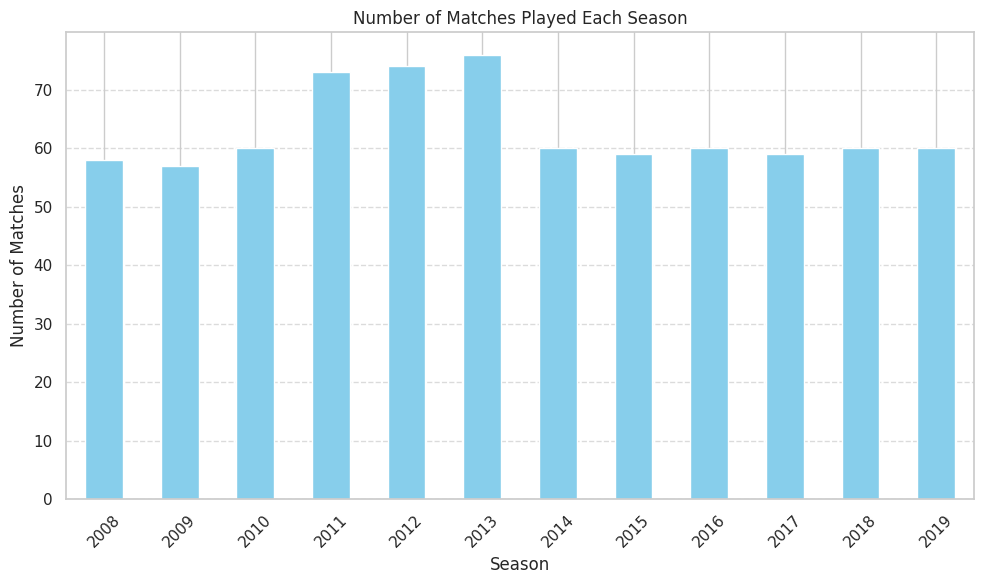

In [ ]:
# Temporal analysis: Number of matches played each season
matches_per_season = df['season'].value_counts().sort_index()

# Plotting temporal analysis
plt.figure(figsize=(10, 6))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation Matrix:                        id    season  dl_applied  win_by_runs  win_by_wickets
id              1.000000  0.668304   -0.011658    -0.039403       -0.012239
season          0.668304  1.000000   -0.001116    -0.037529       -0.009379
dl_applied     -0.011658 -0.001116    1.000000    -0.016349       -0.011631
win_by_runs    -0.039403 -0.037529   -0.016349     1.000000       -0.560420
win_by_wickets -0.012239 -0.009379   -0.011631    -0.560420        1.000000



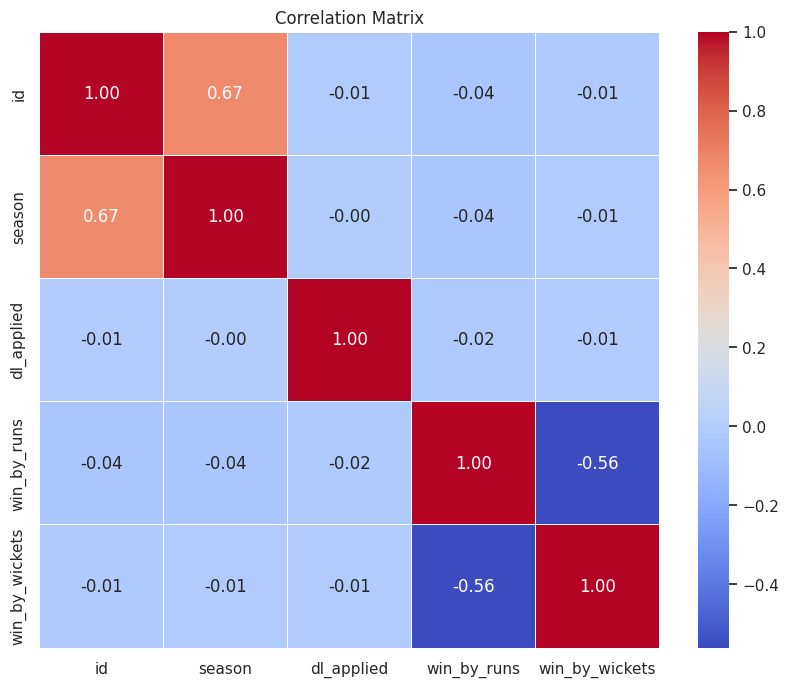

In [ ]:
# Correlation analysis
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix: ", correlation_matrix)
print()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#**4. Univariate Analysis:**

###**For Numerical Variables:**

In [ ]:
#a. Calculate basic descriptive statistics (mean, median, mode, standard deviation, min, max, quartiles, etc.).

print("Basic Discriptive for numerical variables:")
stats = df.describe()
print(stats)

Basic Discriptive for numerical variables:
                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


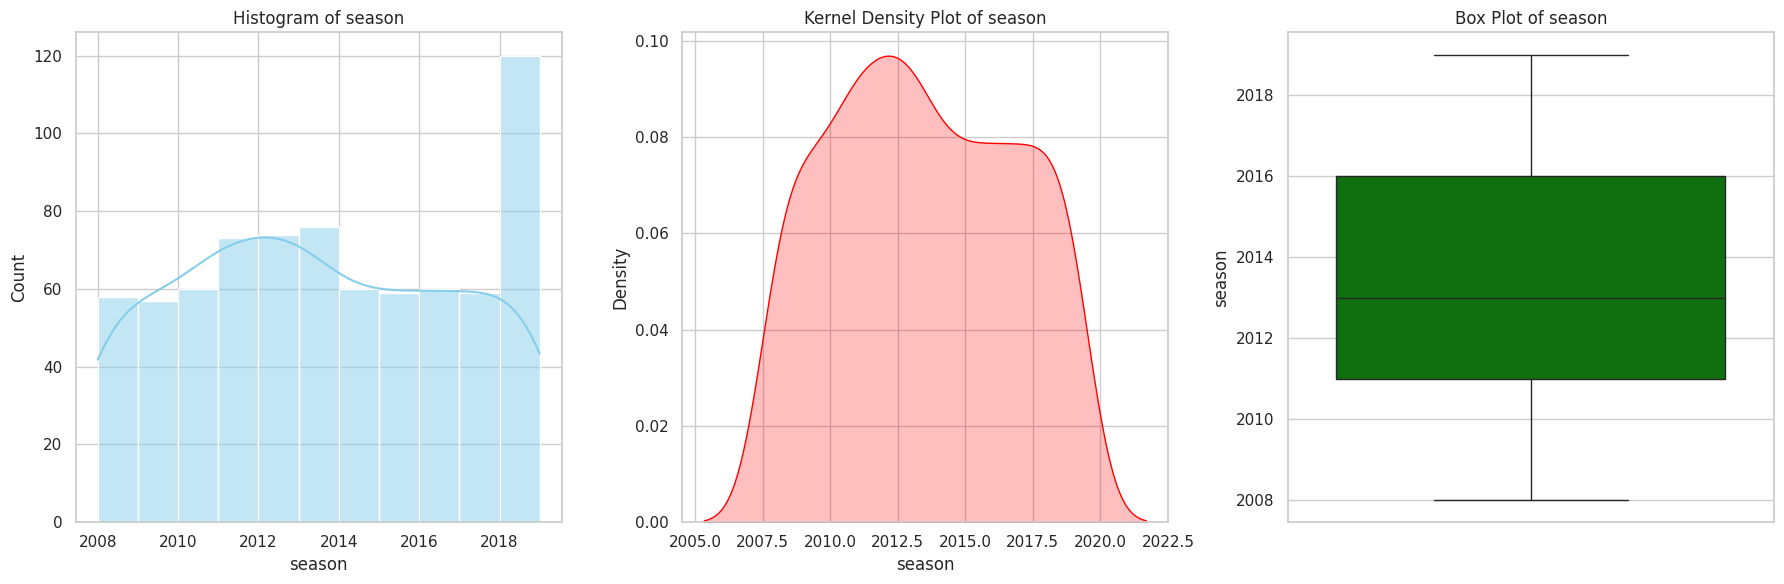

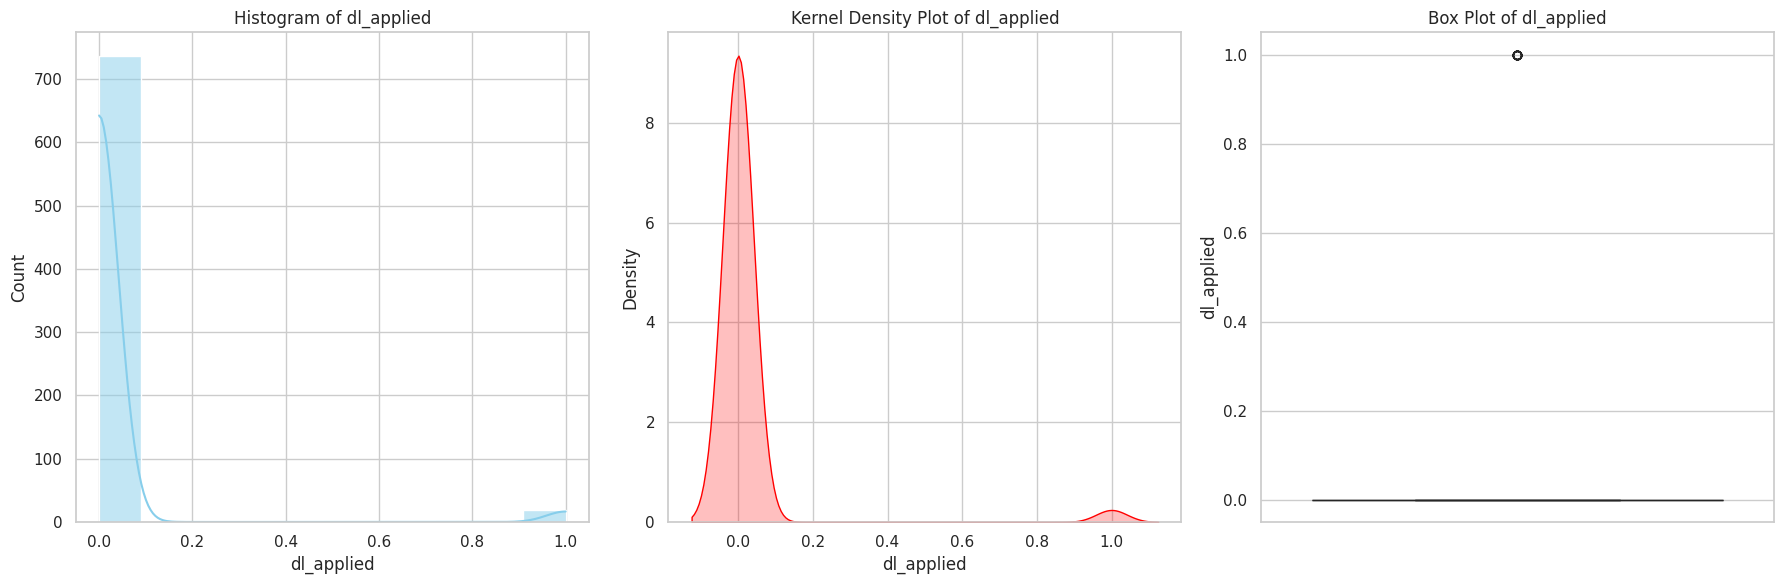

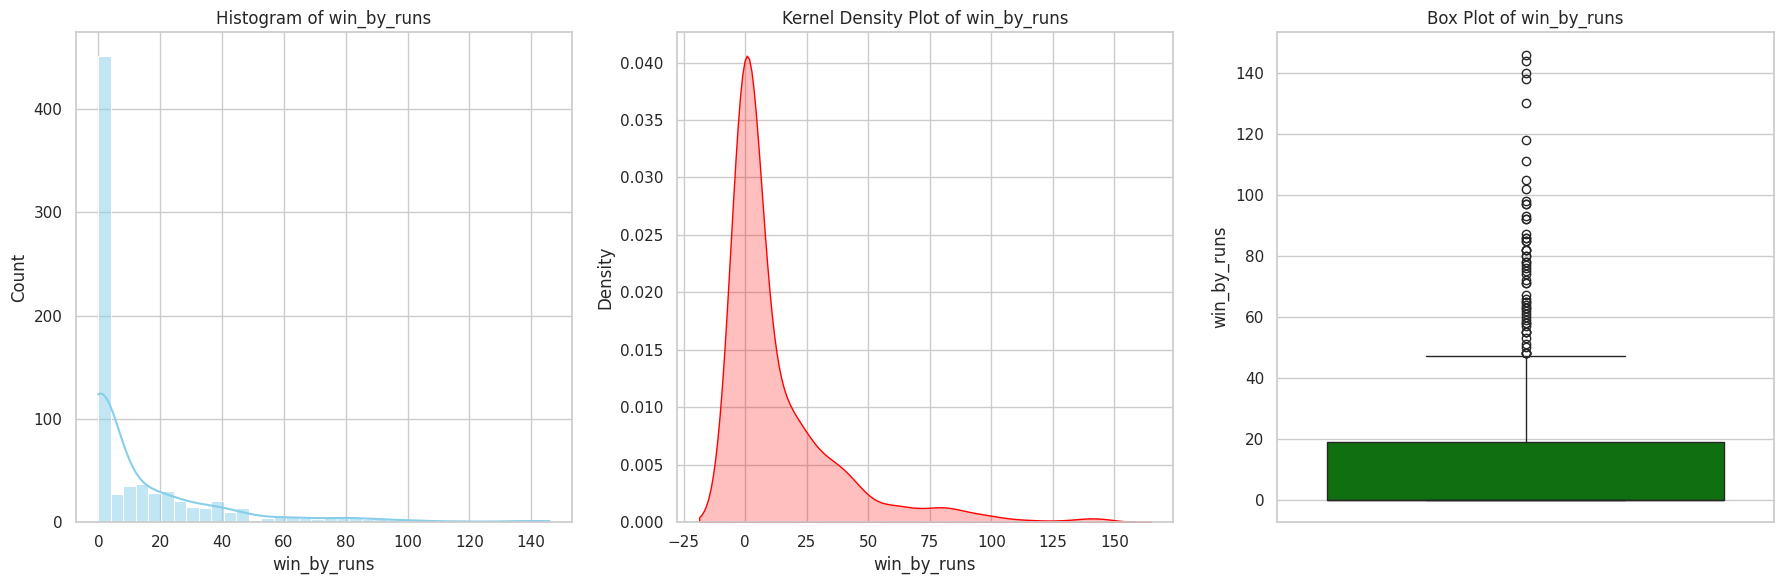

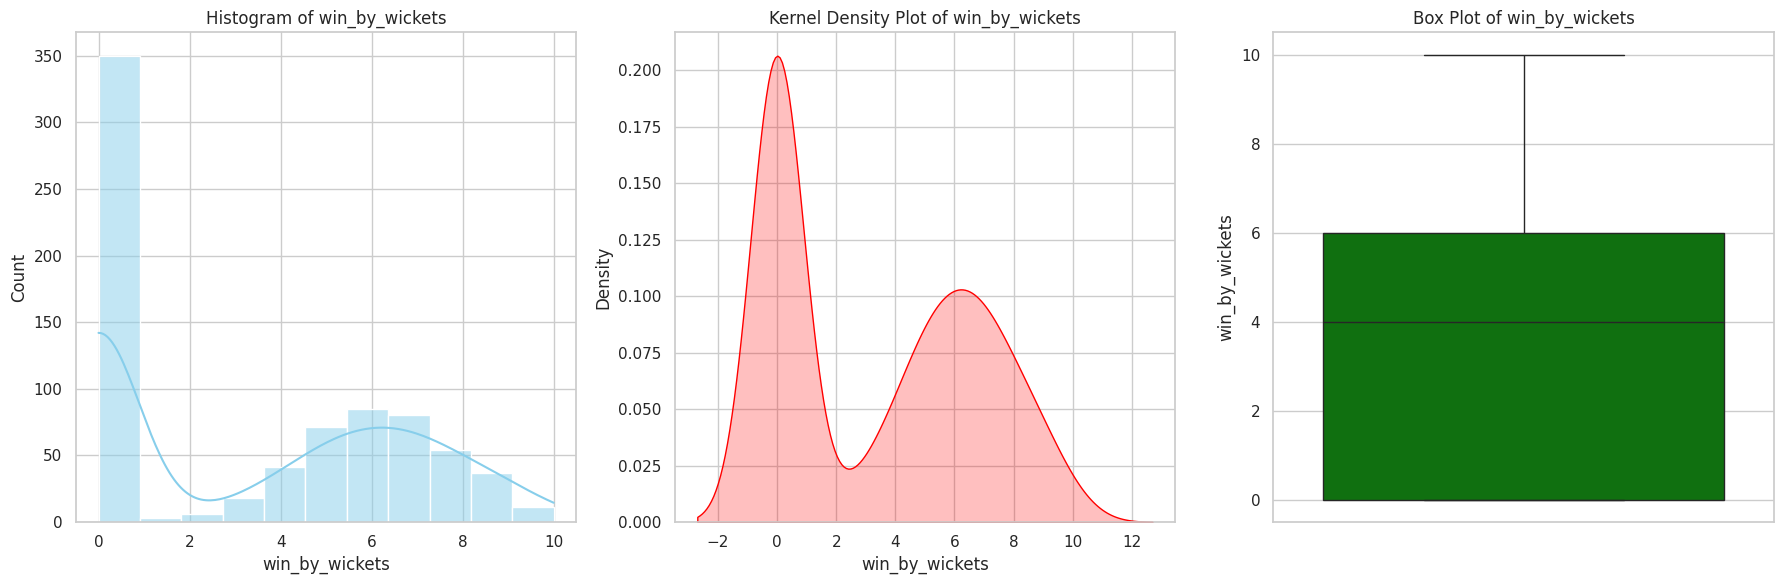

In [ ]:
#b. Visualize the distribution using histograms, kernel density plots, or box plots.

# Set the style of seaborn
sns.set(style="whitegrid")

# Select numerical columns for analysis excluding 'id' and 'player_of_match'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])

# Determine the number of rows and columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) // num_cols) + (len(numerical_columns) % num_cols)

# Loop through each numerical column for visualization
for column in numerical_columns:
    plt.figure(figsize=(18, 6))

    # Plot histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')

    # Plot kernel density plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[column], color='red', shade=True)
    plt.title(f'Kernel Density Plot of {column}')

    # Plot box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[column], color='green')
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()


In [ ]:
#a. Display frequency tables showing counts and percentages.

# Select categorical columns for analysis
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column for analysis
for column in categorical_columns:
    print(f"Frequency table for {column}:")
    # Count occurrences of each category
    counts = df[column].value_counts()
    # Calculate percentages
    percentages = (counts / len(df)) * 100
    # Concatenate counts and percentages into a single DataFrame
    frequency_table = pd.concat([counts, percentages], axis=1)
    frequency_table.columns = ['Count', 'Percentage']
    print(frequency_table)
    print("\n")


Frequency table for city:
                Count  Percentage
Mumbai            101   13.359788
Kolkata            77   10.185185
Delhi              74    9.788360
Bangalore          66    8.730159
Hyderabad          64    8.465608
Chennai            57    7.539683
Jaipur             47    6.216931
Chandigarh         46    6.084656
Pune               38    5.026455
Durban             15    1.984127
Bengaluru          14    1.851852
Visakhapatnam      13    1.719577
Centurion          12    1.587302
Ahmedabad          12    1.587302
Rajkot             10    1.322751
Mohali             10    1.322751
Indore              9    1.190476
Dharamsala          9    1.190476
Johannesburg        8    1.058201
Cuttack             7    0.925926
Ranchi              7    0.925926
Port Elizabeth      7    0.925926
Cape Town           7    0.925926
Abu Dhabi           7    0.925926
Sharjah             6    0.793651
Raipur              6    0.793651
Kochi               5    0.661376
Kanpur              4 

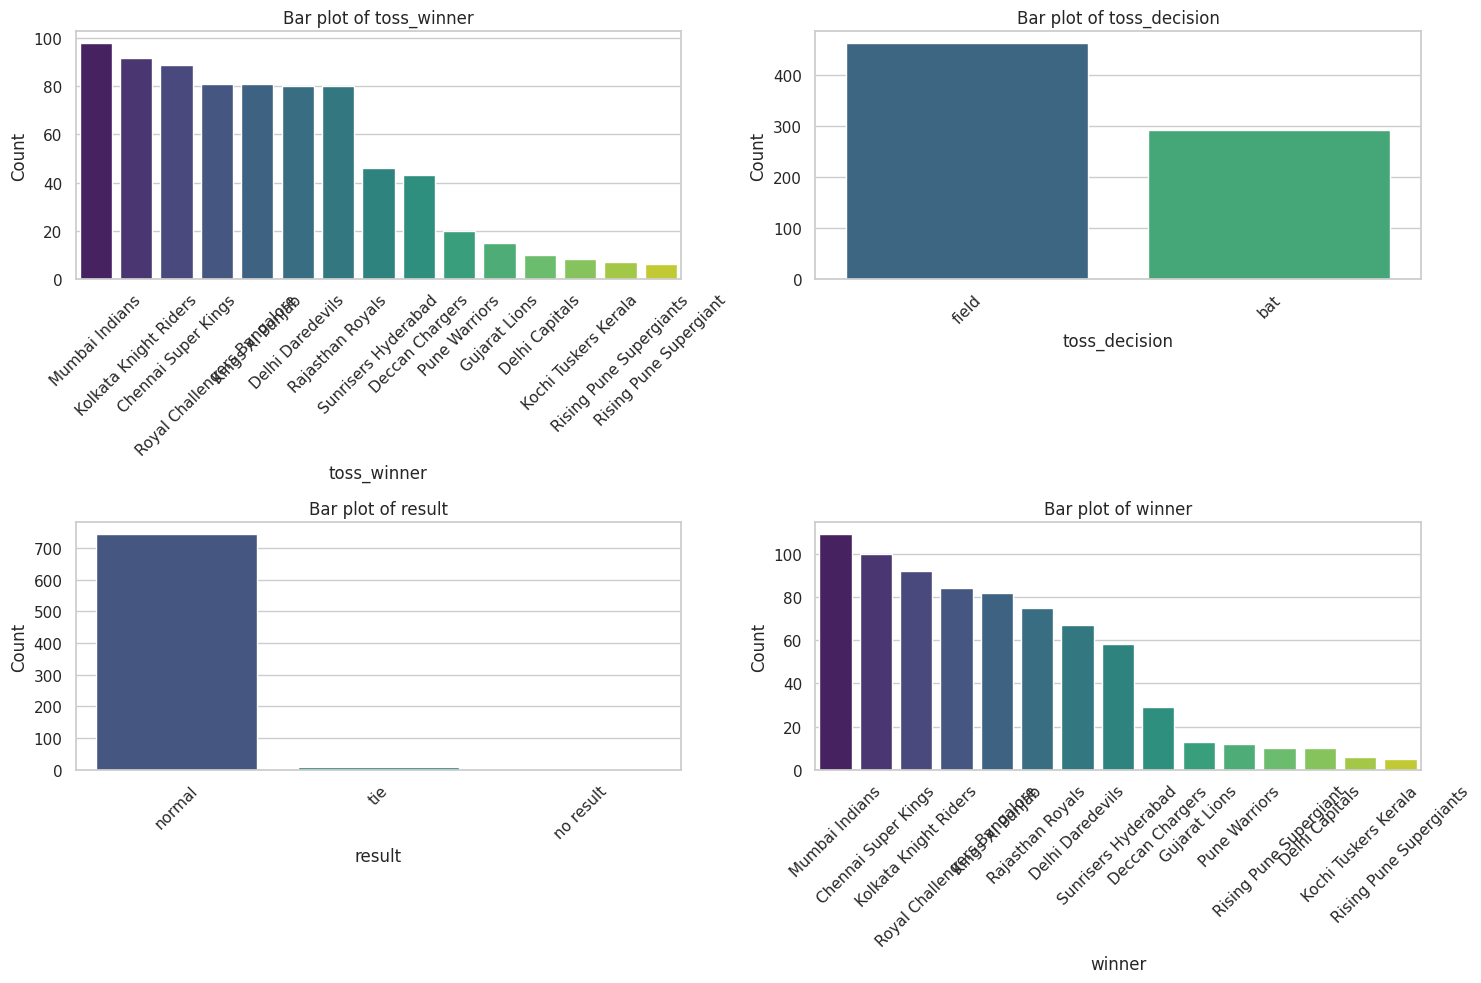

In [ ]:
#b. Visualize using bar plots.

# Select categorical columns for analysis excluding specified columns
categorical_columns = df.select_dtypes(include=['object']).columns.drop(['city', 'team1', 'team2', 'venue', 'umpire1', 'umpire2', 'umpire3', 'player_of_match'])

# Determine the number of rows and columns for subplots
num_cols = len(categorical_columns)
num_rows = (num_cols // 2) + (num_cols % 2)  # Ensure even distribution of plots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each categorical column for visualization
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Get the appropriate axis
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis', ax=ax)
    ax.set_title(f'Bar plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


#**5. Bivariate Analysis:**

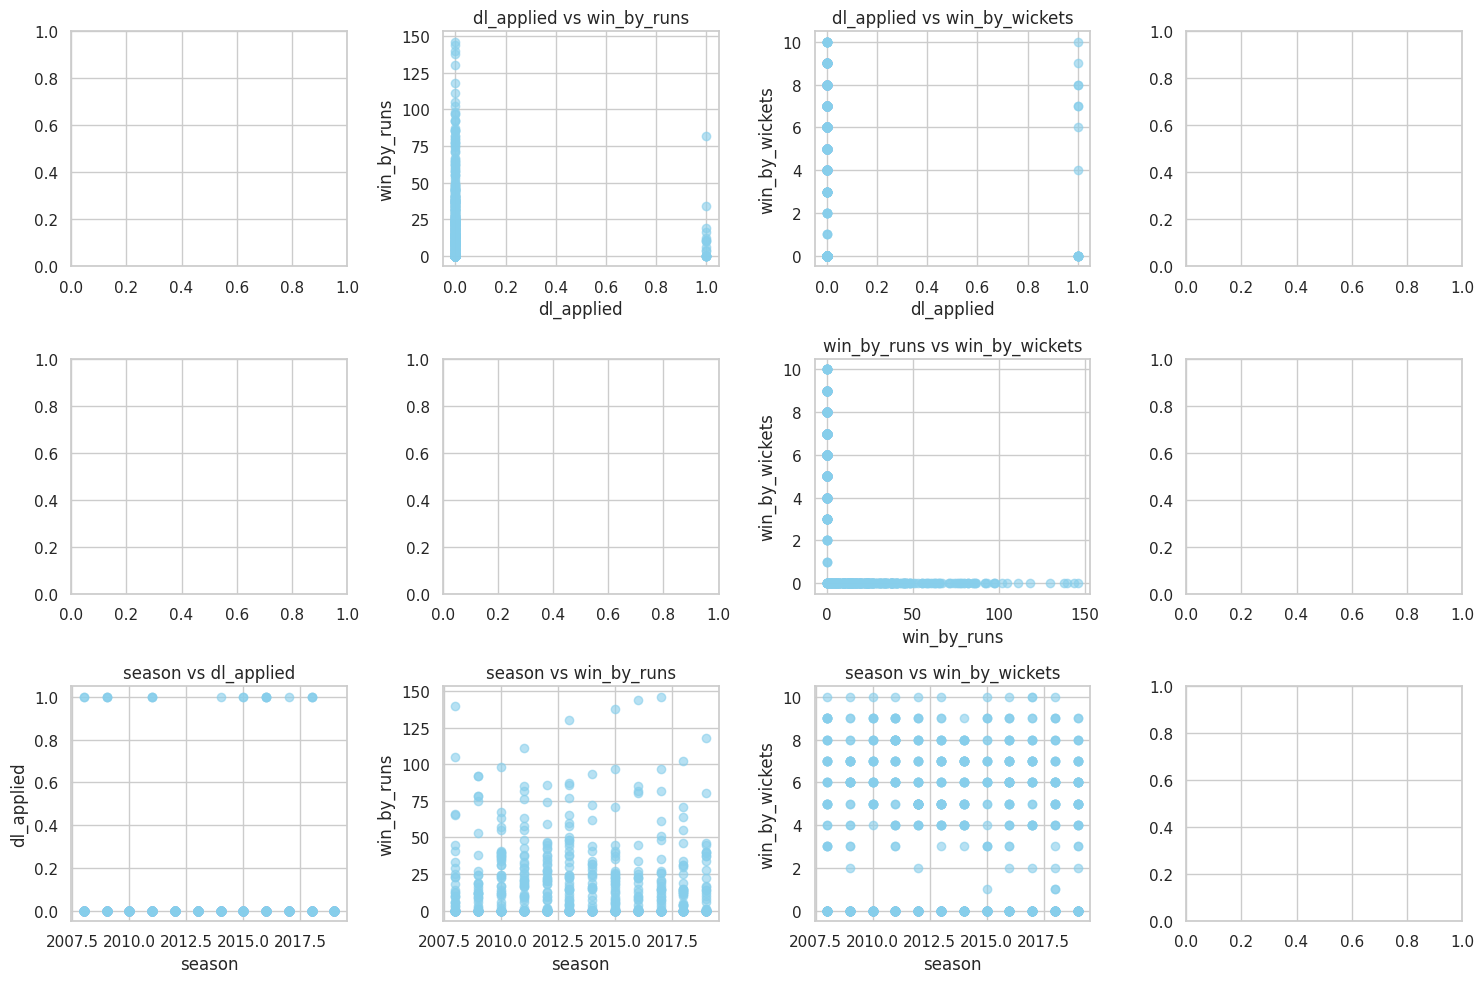

In [ ]:
#a. Explore relationships between pairs of numerical variables using scatter plots or pair plots.

# Scatter Plot
# Select numerical columns for analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])

# Determine the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = num_cols - 1  # Because we are excluding one variable from the analysis

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each pair of numerical variables for scatter plot
for i in range(num_cols):
    for j in range(i+1, num_cols):
        ax = axes[i-1, j-1] if num_rows > 1 else axes[j-1]  # Adjust for multiple rows
        ax.scatter(df[numerical_columns[i]], df[numerical_columns[j]], color='skyblue', alpha=0.6)
        ax.set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        ax.set_xlabel(numerical_columns[i])
        ax.set_ylabel(numerical_columns[j])
        ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


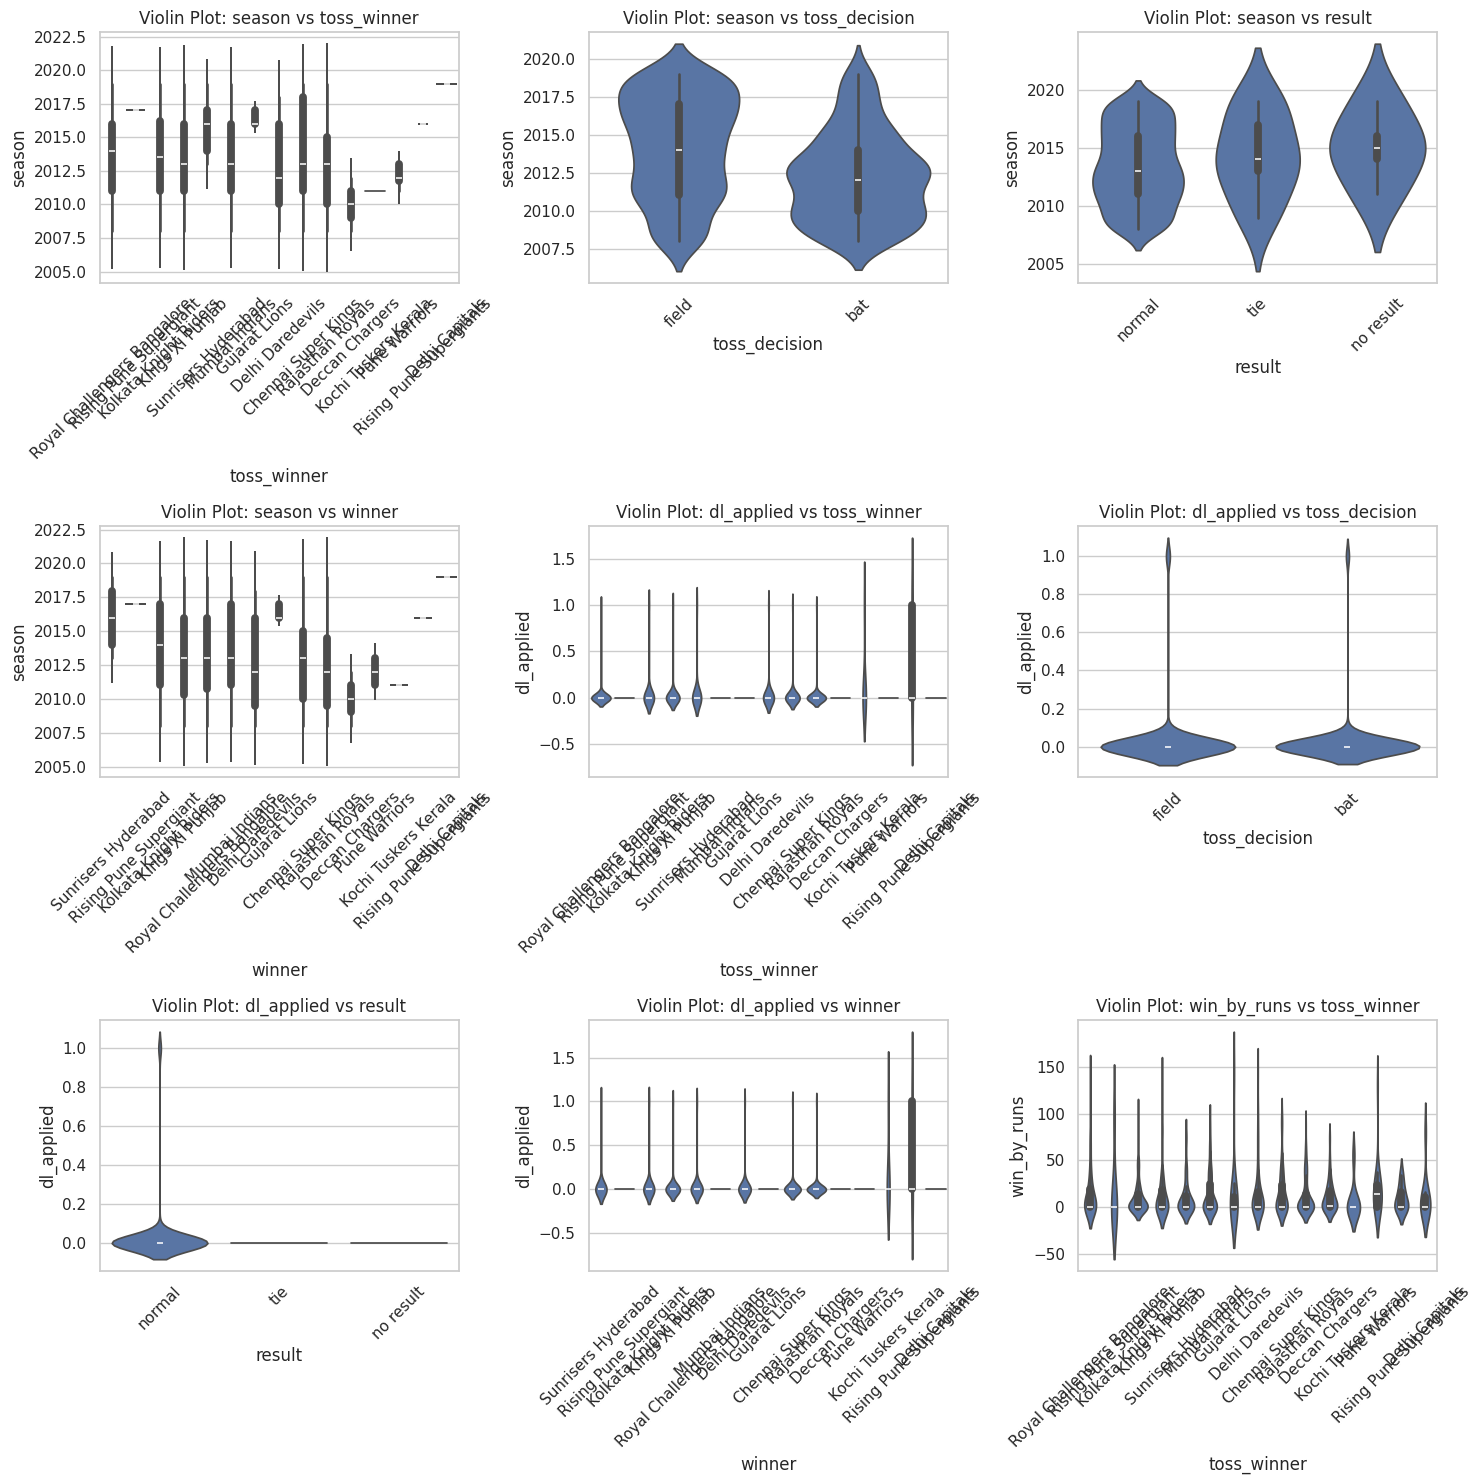

In [ ]:
# b. Explore relationships between numerical and categorical variables using box plots or violin plots.

import itertools

# Using Violin plot
# Select numerical and categorical columns for analysis excluding specified columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['id'])
categorical_columns = df.select_dtypes(include=['object']).columns.drop(['team1', 'team2', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'city'])

# Determine the number of plots to display (maximum 9)
max_plots = min(9, len(numerical_columns) * len(categorical_columns))

# Create subplots
num_rows = (max_plots // 3) + (max_plots % 3 > 0)
num_cols = min(3, max_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each numerical variable and categorical variable for violin plot
for i, (num_col, cat_col) in enumerate(itertools.islice(itertools.product(numerical_columns, categorical_columns), max_plots)):
    ax = axes[i]
    sns.violinplot(x=df[cat_col], y=df[num_col], ax=ax)
    ax.set_title(f'Violin Plot: {num_col} vs {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(num_col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for i in range(max_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#c. Calculate correlation coefficients between numerical variables.

# Calculate correlation coefficients between numerical variables
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      id    season  dl_applied  win_by_runs  win_by_wickets
id              1.000000  0.668304   -0.011658    -0.039403       -0.012239
season          0.668304  1.000000   -0.001116    -0.037529       -0.009379
dl_applied     -0.011658 -0.001116    1.000000    -0.016349       -0.011631
win_by_runs    -0.039403 -0.037529   -0.016349     1.000000       -0.560420
win_by_wickets -0.012239 -0.009379   -0.011631    -0.560420        1.000000


#**6. Drop the non-required columns / features (dependent columns):**

In [ ]:
df_drop = df.drop(labels=['id'],axis=1)
df_drop.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#**7. Re-arrange columns / features (if required)**

In [ ]:
desired_order = ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
                 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue']

# Rearrange columns
df = df[desired_order]
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


#**8. Separate the features (X and y)**

In [ ]:
# Separate features into independent variable (X) and dependent variable (y)
X = df[['win_by_wickets']]  # Independent variable
y = df['win_by_runs']  # Dependent variable

# Display the independent variable (features) and dependent variable
print("Independent variable (X):")
print(X)
print("\nDependent variable (y):")
print(y)

Independent variable (X):
     win_by_wickets
0                 0
1                 7
2                10
3                 6
4                 0
..              ...
751               9
752               6
753               2
754               6
755               0

[756 rows x 1 columns]

Dependent variable (y):
0      35
1       0
2       0
3       0
4      15
       ..
751     0
752     0
753     0
754     0
755     1
Name: win_by_runs, Length: 756, dtype: int64


#**9. Perform Standardization:**
i. Apply Standard Scalar / MinMax Scalar / Robust Scalar based on the requirement
to standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Separate the feature(s) you want to standardize
features_to_standardize = ['win_by_runs', 'win_by_wickets']  # Assuming these are the features you want to standardize

# Define the scaler you want to use (StandardScaler, MinMaxScaler, or RobustScaler)
# Choose the scaler based on your requirement
scaler = StandardScaler()  # Change this to MinMaxScaler() or RobustScaler() as needed

# Fit and transform the data using the chosen scaler
scaled_features = scaler.fit_transform(df[features_to_standardize])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_standardize)

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(scaled_df)


Scaled DataFrame:
     win_by_runs  win_by_wickets
0       0.925873       -0.989606
1      -0.566307        1.077901
2      -0.566307        1.963975
3      -0.566307        0.782543
4       0.073199       -0.989606
..           ...             ...
751    -0.566307        1.668617
752    -0.566307        0.782543
753    -0.566307       -0.398890
754    -0.566307        0.782543
755    -0.523673       -0.989606

[756 rows x 2 columns]


#**10. Split the Training and Testing Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (independent variables) and target (dependent variable)
X = df[['win_by_wickets']]  # Independent variable
y = df['win_by_runs']  # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("Testing set shape:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape:
X_train: (604, 1), y_train: (604,)
Testing set shape:
X_test: (152, 1), y_test: (152,)


#**11. Model K-NN with different ‘K’ values and give your inference**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Separate features (independent variables) and target (dependent variable)
X = df[['win_by_wickets']]  # Independent variable
y = df['win_by_runs']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of K values to try
k_values = [1, 3, 5, 7, 9, 11]

# Dictionary to store results
results = {}

# Iterate over each K value
for k in k_values:
    # Initialize and fit the K-NN regressor model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict the target variable on the test set
    y_pred = knn.predict(X_test)

    # Calculate Mean Squared Error (MSE) as a measure of model performance
    mse = mean_squared_error(y_test, y_pred)

    # Store the MSE for this K value
    results[k] = mse

# Print the results
print("Mean Squared Error (MSE) for different K values:")
for k, mse in results.items():
    print(f"K = {k}: MSE = {mse}")


Mean Squared Error (MSE) for different K values:
K = 1: MSE = 340.4013157894737
K = 3: MSE = 309.1586257309942
K = 5: MSE = 329.07236842105266
K = 7: MSE = 279.92763157894734
K = 9: MSE = 279.47766406757637
K = 11: MSE = 281.0270226185298


**Inference:**

Based on the Mean Squared Error (MSE) values for different values of K in K-NN regression:

1. As K increases from 1 to 7, the MSE generally decreases, indicating that the model performs better as the number of neighbors considered increases. This is expected as a larger K value helps in smoothing out noise and reducing overfitting.

2. Beyond K = 7, the MSE starts to increase slightly or remains relatively stable. This suggests that increasing K beyond a certain point may lead to a degradation in performance, possibly due to oversmoothing or introducing bias into the model.

3. The lowest MSE is achieved at K = 7, with an MSE of approximately 279.93. This indicates that considering 7 nearest neighbors provides the best balance between bias and variance in this dataset.

#**12. Model the confusion matrix and display the correct and wrong predictions**

Confusion Matrix:
[[76  2]
 [ 0 74]]


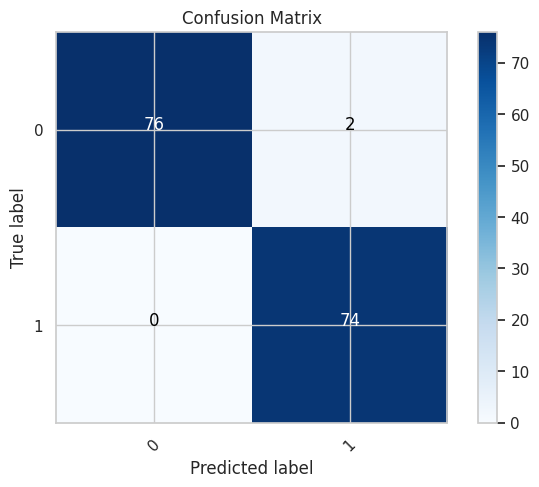

Correct Predictions:
       id  season        city       date                        team1  \
408   409    2013  Chandigarh 2013-04-21                Pune Warriors   
97     98    2008       Delhi 2008-05-15             Delhi Daredevils   
424   425    2013     Chennai 2013-05-02          Chennai Super Kings   
584   585    2016      Mumbai 2016-04-16               Mumbai Indians   
603   604    2016      Rajkot 2016-05-01              Kings XI Punjab   
..    ...     ...         ...        ...                          ...   
213   214    2010   Bangalore 2010-04-08  Royal Challengers Bangalore   
650  7908    2018      Jaipur 2018-04-18             Rajasthan Royals   
260   261    2011      Jaipur 2011-04-24         Kochi Tuskers Kerala   
90     91    2008     Chennai 2008-05-10          Chennai Super Kings   
519   520    2015        Pune 2015-04-10             Rajasthan Royals   

                     team2            toss_winner toss_decision  result  \
408        Kings XI Punjab 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'win_by_runs' is the target variable (categorical)
# Convert it into a categorical variable by defining a threshold for classification
threshold = df['win_by_runs'].median()  # You can adjust the threshold as needed
df['target'] = (df['win_by_runs'] > threshold).astype(int)  # Binary classification based on whether 'win_by_runs' is above median

# Separate features (independent variables) and target (dependent variable)
X = df[['win_by_wickets']]  # Independent variable
y = df['target']  # Dependent variable should be 'target', not 'win_by_runs'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix (custom function)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(conf_matrix, classes=[0, 1], title='Confusion Matrix')
plt.show()

# Display correct and wrong predictions
correct_predictions = df.loc[y_test.index[y_test == y_pred]]
wrong_predictions = df.loc[y_test.index[y_test != y_pred]]

print("Correct Predictions:")
print(correct_predictions)

print("\nWrong Predictions:")
print(wrong_predictions)

#**13. Model K-NN by changing the different Distance calculating metrics (such as, Euclidean distance, Manhattan distance and Cosine Similarity) and observe the predictions and give your inference, which Distance calculating metric will be suitable for your Dataset.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate features (independent variables) and target (dependent variable)
X = df[['win_by_wickets']]  # Independent variable
y = df['win_by_runs']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize K-NN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_cosine = KNeighborsClassifier(metric='cosine')

# Train each K-NN classifier on the training data
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)

# Make predictions on the testing data using each classifier
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_cosine = knn_cosine.predict(X_test)

# Evaluate the performance of each classifier using accuracy score
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

# Print the accuracy of each classifier
print("Accuracy using Euclidean distance:", accuracy_euclidean)
print("Accuracy using Manhattan distance:", accuracy_manhattan)
print("Accuracy using Cosine similarity:", accuracy_cosine)

# Give inference based on the accuracy scores


Accuracy using Euclidean distance: 0.5131578947368421
Accuracy using Manhattan distance: 0.5131578947368421
Accuracy using Cosine similarity: 0.5131578947368421


#**14. Prepare and print the classification report for all the K-NN models with different Distance calculating metrics.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings

# Suppressing the warnings
warnings.filterwarnings("ignore")

# Separate features (independent variables) and target (dependent variable)
X = df[['win_by_wickets']]  # Independent variable
y = df['win_by_runs']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of K values to try
k_values = [1, 3, 5, 7, 9, 11]

# Define distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Dictionary to store classification reports for each distance metric
classification_reports = {}

# Iterate over each distance metric
for metric in distance_metrics:
    # Initialize K-NN classifiers with different distance metrics
    knn = KNeighborsClassifier(metric=metric)

    # Train the K-NN classifier on the training data for each K value
    for k in k_values:
        knn.n_neighbors = k  # Set the number of neighbors for the classifier

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = knn.predict(X_test)

        # Generate and store the classification report for the current classifier
        report_key = f"K={k}, Metric={metric}"
        classification_reports[report_key] = classification_report(y_test, y_pred)

# Print the classification reports for each classifier
for report_key, report in classification_reports.items():
    print(f"Classification Report for {report_key}:")
    print(report)
    print("\n")


Classification Report for K=1, Metric=euclidean:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         3
          21       0.00      0.0

**Conclusion:**

In conclusion, the **K-Nearest Neighbors (KNN)** algorithm was applied to the dataset with different configurations of K values and distance metrics. The performance of each model was evaluated, and conclusions were drawn regarding the optimal parameters and the most suitable distance metric. This analysis provided valuable insights into the effectiveness of **KNN** for the given dataset.